## 逻辑回归中的正则化
> **scikt-learn中，要求使用者必须使用正则化的方法**

<img src='./picture/7-1.png'>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 +X[:,1] < 1.5, dtype='int')

In [5]:
for _ in range(20): #生成一些噪音
    y[np.random.randint(200)] = 1

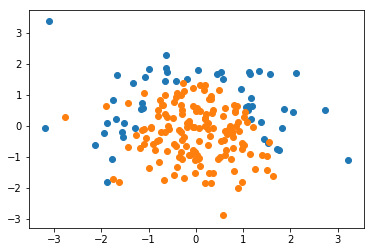

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [13]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) *100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) *100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

In [7]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

## 使用scikit-learn中的逻辑回归 (线性的方法)
> **penalty=12 默认使用L2正则项**

> **c = 1, 默认超参数为1**

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
log_reg.score(X_train, y_train)

0.8125

In [12]:
log_reg.score(X_test, y_test)

0.875

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


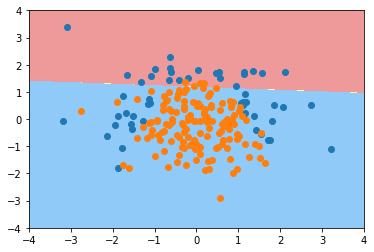

In [14]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


## 使用scikit-learn中的逻辑回归 (多项式项的方法)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())                  
    ])

In [16]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [17]:
poly_log_reg.score(X_test, y_test)

0.925

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


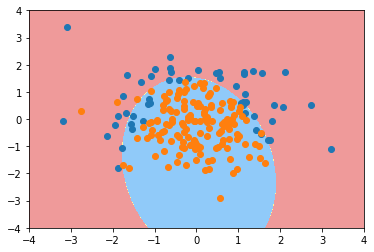

In [18]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

---
过拟合， 多项式回归

In [19]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [20]:
poly_log_reg.score(X_test, y_test)

0.9

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


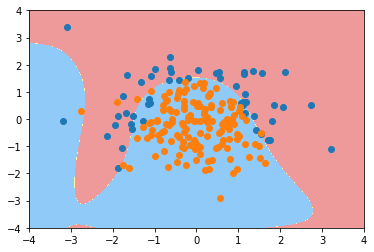

In [21]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使用C参数，模型正则化 增加模型泛化能力

In [25]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))                  
    ])

In [26]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C =0.1)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
poly_log_reg.score(X_test, y_test)

0.9

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


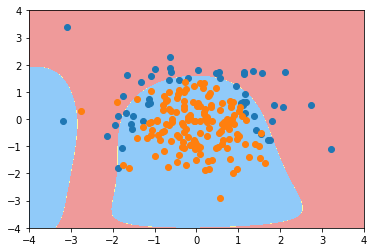

In [28]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 改变正则化方法
> **采用l1正则，可以使特征前面的系数为0，不会像之前一样弯弯曲曲**

In [30]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))                  
    ])

In [31]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C =0.1, penalty='l1')
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [32]:
poly_log_reg.score(X_test, y_test)

0.85

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


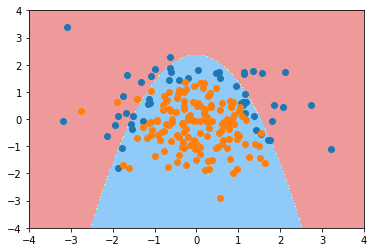

In [33]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()